# Descriptive Anlytics


In [2]:
# Import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Colors
colors = ['#005055', '#64afa0', '#6ec34b', '#198cc3']

In [25]:
# Read the dataset
dta_file_path = 'MSI_2024_CEI_Afghanistan.dta'
csv_file_path = 'MSIA_2024_CEI Data.csv'

stata_data = pd.read_stata(dta_file_path, convert_categoricals=False)
original_data = pd.read_csv(csv_file_path)

In [ ]:
# Check basic information and first few rows of the stata
stata_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Columns: 380 entries, starttime to pillar1
dtypes: datetime64[ns](4), float32(109), float64(128), int16(31), int32(1), int8(77), object(30)
memory usage: 611.7+ KB


In [ ]:
# Check basic information and first few rows of the csv
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Columns: 380 entries, starttime to pillar1
dtypes: float64(28), int64(37), object(315)
memory usage: 991.7+ KB


In [ ]:
# Read labels stata file
itr = pd.read_stata(dta_file_path, iterator=True)
itr.variable_labels()

{'starttime': 'starttime',
 'endtime': 'endtime',
 'deviceid': 'deviceid',
 'devicephonenum': 'devicephonenum',
 'subscriberid': 'subscriberid',
 'simid': 'simid',
 'DATAUSE': 'Client consent for sharing anonymous data',
 'DATE': "Enter today's date",
 'FACTYPE': 'Type of facility or site',
 'NAME_C': 'Enter the name of the Centre',
 'NAME_OR': 'Enter the name of the Outreach site',
 'NAME_SF': 'Enter the name of the Social Franchise',
 'NAME_MSL': 'Enter the name of the MS Lady/ site',
 'NAME_PSS': 'Enter the name of the PSS site',
 'NAME_OTH': 'Enter the name of the site',
 'REGION': 'Enter facility/site region',
 'LOCATION': 'Enter type of location',
 'TR2DH': 'How long did it take you to travel here today? Hours',
 'TR2DM': 'How long did it take you to travel here today? Minutes',
 'FPTYPE': 'FPTYPE',
 'FPTYPEFPMETH': 'Contraception: Contraceptive method(s) received',
 'FPTYPEFPREM': 'Contraception: Contraceptive method removed',
 'FPTYPEFPNO': 'Contraception: No contraceptive meth

### Data Collection Dates
#### 1. Check Overall Start Date and End Date

In [ ]:
overall_start_date = original_data['starttime'].min()  # Earliest start date
overall_end_date = original_data['endtime'].max()  # Latest end date

print(f"Data Collection Start Date: {overall_start_date}")
print(f"Data Collection End Date: {overall_end_date}")

Data Collection Start Date: 17-Dec-24
Data Collection End Date: 26-Dec-24


#### 2: Calculate the duration of data collection

## Module 1: Interview and Site Information

### Variables
- 'DATE': "Enter today's date",
- 'FACTYPE': 'Type of facility or site',
- 'NAME_C': 'Enter the name of the Centre',
- 'NAME_OR': 'Enter the name of the Outreach site',
- 'NAME_SF': 'Enter the name of the Social Franchise',
- 'NAME_MSL': 'Enter the name of the MS Lady/ site',
- 'NAME_PSS': 'Enter the name of the PSS site',
- 'NAME_OTH': 'Enter the name of the site',
- 'REGION': 'Enter facility/site region',
- 'LOCATION': 'Enter type of location',

### Analysis Questions
1. How is the distribution of facility types across regions?
2. What is the most common location type for different facility types?


#### 1. How is the distribution of facility types across regions?

In [ ]:
# Distribution of surveys accorss each site
site_distribution = original_data.groupby('FACTYPE').size().reset_index(name="Total Surveys in Each Site")

site_distribution

,FACTYPE,Total Surveys in Each Site
0,MS Lady,109
1,MSI centre,115
2,Outreach,110


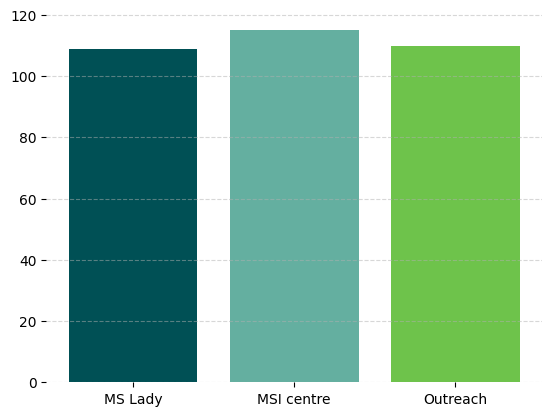

In [ ]:
ax = plt.bar(site_distribution['FACTYPE'], site_distribution['Total Surveys in Each Site'], color=colors)
# Remove border (spines) around the plot
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [ ]:
# How is the distribution of facility types across regions?
original_data['REGION'].replace('Other', 'Central', inplace=True)

facility_types = original_data.groupby(['REGION', 'FACTYPE']).size().reset_index(name='Count')
facility_types

<ipython-input-87-333fd0c19b1d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  original_data['REGION'].replace('Other', 'Central', inplace=True)


,REGION,FACTYPE,Count
0,Central,MSI centre,29
1,East,MSI centre,10
2,North,MS Lady,65
3,North,MSI centre,32
4,North,Outreach,69
5,South,MS Lady,23
6,South,MSI centre,20
7,West,MS Lady,21
8,West,MSI centre,24
9,West,Outreach,41


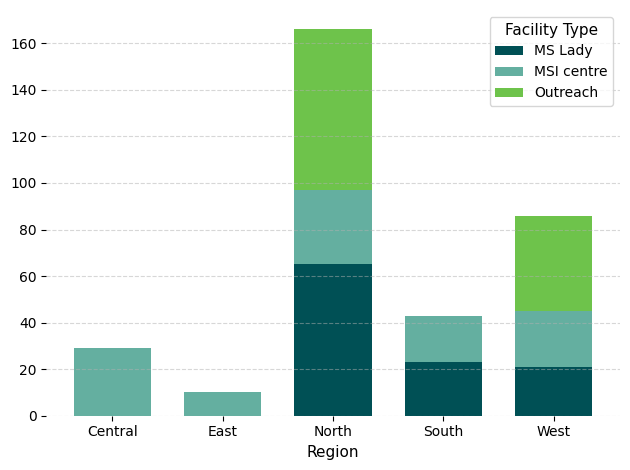

In [ ]:
# Visualization: Stacked bar chart
vis_facility_types = facility_types.pivot(index='REGION', columns='FACTYPE', values='Count')

ax = vis_facility_types.plot(kind='bar', stacked=True, width=0.7, color=colors)
#plt.title('Stacked Bar Chart: Facility Type Distribution by Region')
plt.xlabel('Region', fontsize=11)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.legend(title='Facility Type', title_fontsize=11, fontsize=10)
plt.yticks(fontsize=10)

for spine in ax.spines.values():
    spine.set_visible(False)

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjusting the layout to avoid overlap and ensure everything fits
plt.tight_layout()

plt.show()


In [ ]:
# Add percentage/proportion column
region_totals = facility_types.groupby('REGION')['Count'].transform('sum')
facility_types['Percentage'] = (facility_types['Count'] / region_totals) * 100

In [ ]:
facility_types

,REGION,FACTYPE,Count,Percentage
0,Central,MSI centre,29,100.000000
1,East,MSI centre,10,100.000000
2,North,MS Lady,65,39.156627
3,North,MSI centre,32,19.277108
4,North,Outreach,69,41.566265
5,South,MS Lady,23,53.488372
6,South,MSI centre,20,46.511628
7,West,MS Lady,21,24.418605
8,West,MSI centre,24,27.906977
9,West,Outreach,41,47.674419


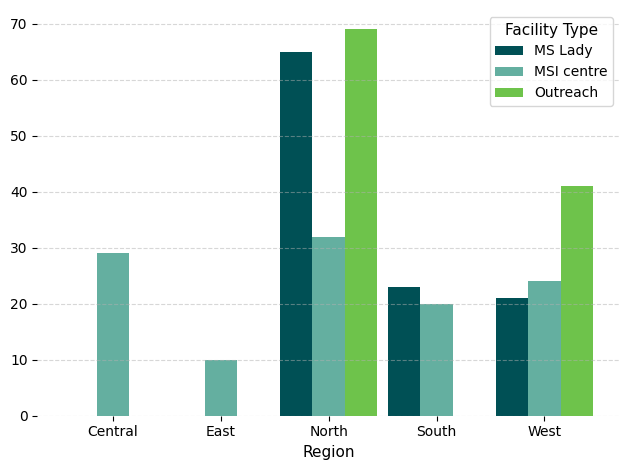

In [ ]:
# Assuming `facility_types` is a DataFrame already defined
vis_facility_types = facility_types.pivot(index='REGION', columns='FACTYPE', values='Count')

# Plotting the clustered bar chart with adjusted layout
ax = vis_facility_types.plot(kind='bar', width=0.9, color=colors, edgecolor='none')

# Customizing the chart with additional aesthetics
#plt.title('Facility Type Distribution by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=11)
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.yticks(fontsize=10)

# Removing the border around the chart (spines)
for spine in ax.spines.values():
    spine.set_visible(False)

# Adding a legend and improving its layout
plt.legend(title='Facility Type', title_fontsize=11, fontsize=10,)

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjusting the layout to avoid overlap and ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()


#### 2. What is the most common location type for different facility types?

In [ ]:
# Step: Cross-tabulation or contingency table between FACTYPE and LOCATION

common_location_type = pd.crosstab(original_data['FACTYPE'], original_data['LOCATION'])

common_location_type

LOCATION,Peri-urban,Rural,Urban
FACTYPE,,,
MS Lady,10,38,61
MSI centre,5,10,100
Outreach,62,25,23


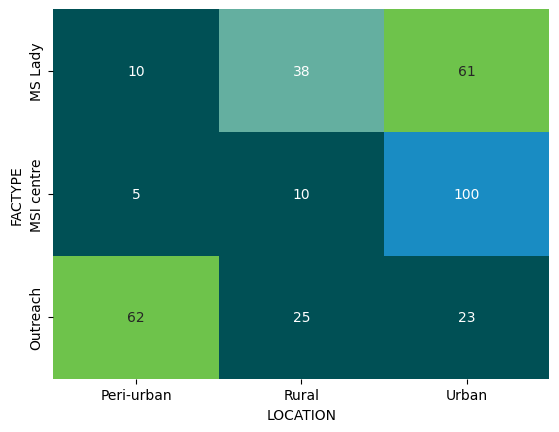

In [ ]:
#heatmap for visualization of above table
sns.heatmap(common_location_type, annot=True, cmap=colors, fmt='d', cbar=False)
#plt.title("Facilty Type in Different Locations")
plt.show()

## Module 2: Demographic Module
### A. Demographic Profile
1. What is the age range and median age of the respondents?
2. What is the education distribution attained by the respondents?
3. What distribution of respondents are married, single, divorced, or widowed?
4. How many respondents have children, and what is the average number of children per respondent?

#### 1. What is the age range and median age of the respondents?

In [ ]:
min_age = original_data['AGE'].min()
max_age = original_data['AGE'].max()
average_age = original_data['AGE'].mean()
median_age = original_data['AGE'].median()

print(f"The age range of respondents is: {min_age} to {max_age}")

print(f"The average age of respondents is {np.round(average_age, 2)} and median value is {round(median_age, 2)}")

The age range of respondents is: 15 to 55
The average age of respondents is 30.28 and median value is 30.0


#### 2. What is the education distribution attained by the respondents?

In [ ]:
# Overall education level of respondents
education_level = original_data.groupby('EDU').size().reset_index(name='Count')

education_level = education_level.sort_values(by='Count')

education_level

,EDU,Count
4,"Some secondary, vocational or technical",9
5,Some tertiary or higher,16
1,"Completed secondary, vocational or technical",18
0,Completed primary,43
3,Some primary,54
2,None / non-formal,194


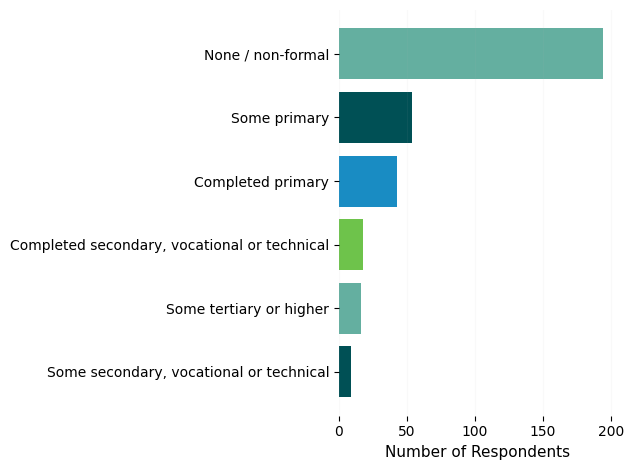

In [ ]:
# Assuming 'education_level' DataFrame is already defined and 'colors' is specified
ax = plt.barh(education_level['EDU'], education_level['Count'], color=colors)

# Adding chart details with improved aesthetics
plt.xlabel('Number of Respondents', fontsize=11)

# Remove border (spines) around the plot
for spine in plt.gca().spines.values():
    spine.set_visible(False)

#plt.title('Overall Education Level of Respondents', fontsize=16, fontweight='bold')
plt.xlabel('Number of Respondents', fontsize=11)
plt.grid(axis='x', linestyle='-', alpha=0.07)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Region-based education level of each respodent
original_data.groupby(['REGION', 'EDU']).size().reset_index()

,REGION,EDU,0
0,East,None / non-formal,3
1,East,Some primary,6
2,East,Some tertiary or higher,1
3,North,Completed primary,12
4,North,"Completed secondary, vocational or technical",18
5,North,None / non-formal,91
6,North,Some primary,31
7,North,"Some secondary, vocational or technical",6
8,North,Some tertiary or higher,8
9,Other,None / non-formal,19


#### 3. What distribution of respondents are married, divorced, or widowed?

In [ ]:
marital_status = original_data.groupby('MAR').size().reset_index(name="Count")

marital_status

,MAR,Count
0,Married,333
1,Widowed / Divorced / Separated,1


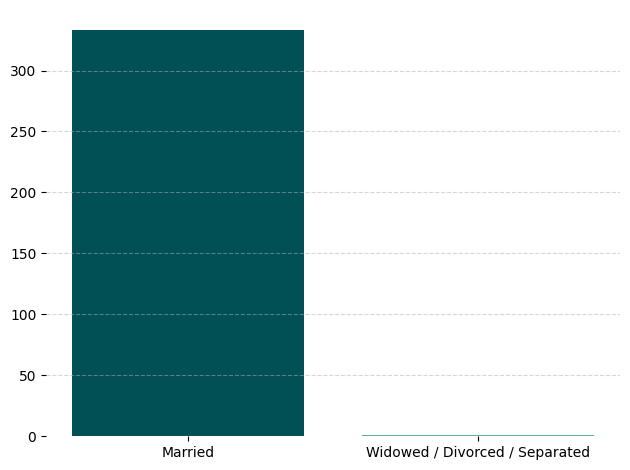

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'marital_status' DataFrame is already defined and 'colors' is specified
plt.bar(marital_status['MAR'], marital_status['Count'], color=colors)

# Remove border (spines) around the plot
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()


#### 4. How many respondents have children, and what is the average number of children per respondent?

In [ ]:
original_data.groupby('CHILD').size().reset_index(name='Total Respondents')

,CHILD,Total Respondents
0,0,5
1,1,31
2,2,42
3,3,60
4,4,50
5,5,47
6,6,34
7,7,17
8,8,24
9,9,13


In [ ]:
print(f"Five respondents reported that they have {original_data['CHILD'].min()} number of children.")
print(f"On Average the respondents reported {round(original_data['CHILD'].mean(), 0)} number of children.")

Five respondents reported that they have 0 number of children.
On Average the respondents reported 4.0 number of children.


### B. Employment and Displacement
1. What are the most common occupations of the respondents?
2. What percentage of respondents have experienced displacement?
3. What are the primary reasons for displacement?

#### 1. What are the most common occupations of the respondents?

In [ ]:
occupation = original_data.groupby('JOB').size().reset_index(name='Total Respondents')

occupation.sort_values(by='Total Respondents', inplace=True)

occupation

,JOB,Total Respondents
4,Skilled manual,1
7,Unskilled manual - paid,1
0,Agriculture - paid,2
1,Agriculture - unpaid,3
3,Professional / technical / managerial,16
5,"Unemployed, looking for work",17
6,"Unemployed, not looking for paid work",70
2,Homemaker,224


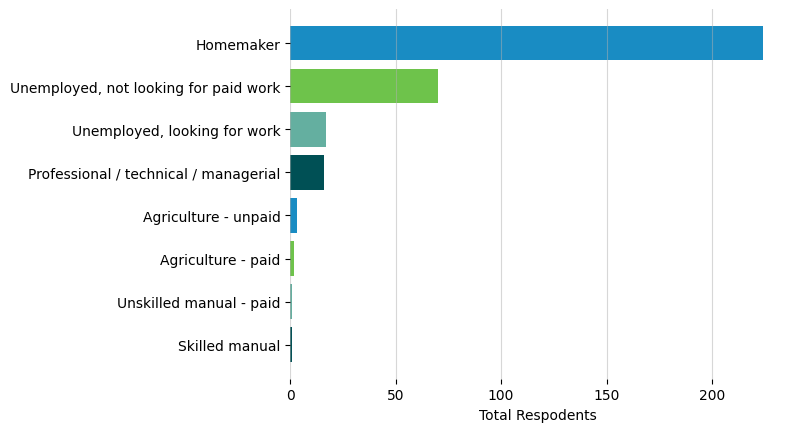

In [ ]:
# Visualize job distribution
ax = plt.barh(occupation['JOB'], occupation['Total Respondents'], color=colors)
#plt.title('Occupation Frequency by Respodents')

# Remove border (spines) around the plot
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xlabel('Total Respodents')
plt.grid(axis='x', linestyle='-', alpha=0.5)

plt.show()

#### 2. What percentage of respondents have experienced displacement?



In [ ]:
displaced = original_data.groupby('DISPLACED').size().reset_index(name = 'Count')

displaced['Percentage'] = (displaced['Count'] / len(original_data)) * 100

displaced.sort_values(by='Count', inplace=True, ascending=False)

displaced

,DISPLACED,Count,Percentage
0,No,291,87.125749
2,Yes,42,12.574850
1,Refused,1,0.299401


In [ ]:
# Count the number of respondents who are displaced
displaced_count = original_data[original_data['DISPLACED'] == 'Yes'].shape[0]

# Calculate the displaced percentage
displaced_percentage = (displaced_count / len(original_data)) * 100

# Printing the result
print(f"{displaced_percentage:.2f}% responded that they have been displaced from their original hometown.")

12.57% responded that they have been displaced from their original hometown.


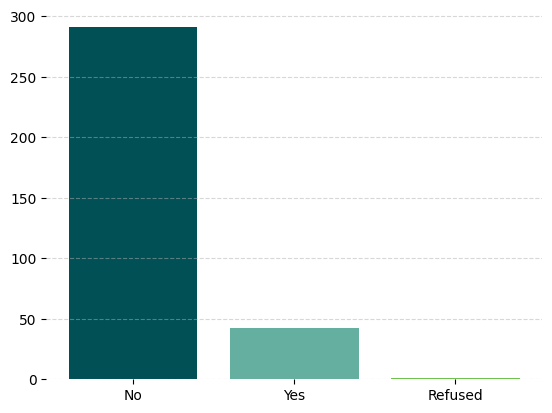

In [ ]:
ax = plt.bar(displaced['DISPLACED'], displaced['Count'], color=colors)
# Remove border (spines) around the plot
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

#### 4. What are the primary reasons for displacement?

In [ ]:
# The primary displacement reason

displacedment_reasons = original_data[original_data['DISPLACED'] == 'Yes'].groupby('WHY_DISPB').size().reset_index(name='Number of Respondents Displaced')

displacedment_reasons

,WHY_DISPB,Number of Respondents Displaced
0,Displacement due to natural disaster/climate c...,6
1,Economic reasons,21
2,Education,1
3,Forced displacement due to armed conflict and ...,10
4,Other,1


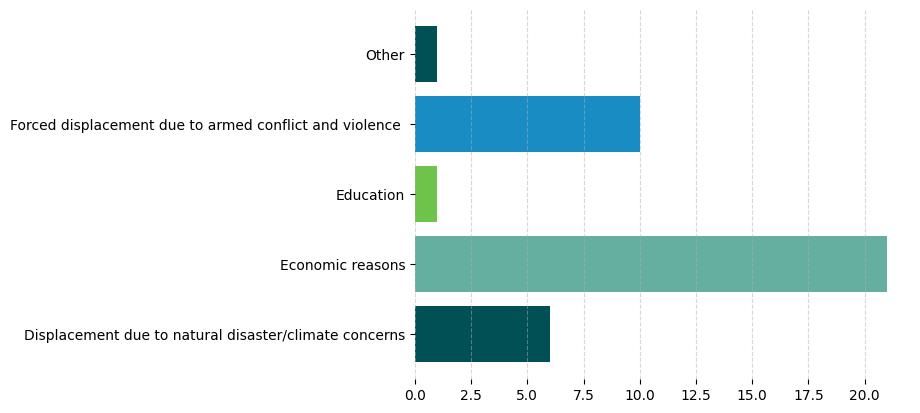

In [ ]:
ax = plt.barh(displacedment_reasons['WHY_DISPB'], displacedment_reasons['Number of Respondents Displaced'], color=colors)
# Remove border (spines) around the plot
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

### C. Disabilities and Accessibility
1. What percentage of respondents report difficulty in seeing, hearing, walking, or climbing steps?
2. A region-wise analysis to identify the portion of beneficieries with disabilities.

#### Variables:
- DIS1: Do you have difficulty seeing?
- DIS2: Do you have difficulty hearing?
- DIS3: Do you have difficulty sitting, standing, walking or climbing steps? -
- DIS4: Do you have difficulty remembering or concentrating?
- DIS5: Do you have difficulty with self-care?
- DIS6: Using your usual language, do you have difficulty communicating?

#### Formula to Calculate Disability Prevalence:

- Disability=Any response in {Seeing, Hearing, Walking, Remembering, Self-care, Communicating} ≥ 3

- Responses should be coded as:
1 = No difficulty
2 = Some difficulty
3 = A lot of difficulty
4 = Cannot do it at all

- Prevalence Rate = (Number of Respondents with a Disability / Total Number of Respondents) * 100

In [8]:
# original responses
original_data['DIS1'].unique()

array(['No - no difficulty', 'Yes – some difficulty',
       'Yes – a lot of difficulty'], dtype=object)

In [23]:
# Columns related to disability
disability_columns = ["DIS1", "DIS2", "DIS3", "DIS4", "DIS5", "DIS6"]

In [24]:
# Mapping dictionary
response_map = {
    "No - no difficulty": 1,
    "Yes – some difficulty": 2,
    "Yes – a lot of difficulty": 3,
    "Cannot do it at all": 4,
}

In [26]:
original_data[disability_columns] = original_data[disability_columns].applymap(response_map.get)

<ipython-input-26-47dbfb920771>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  original_data[disability_columns] = original_data[disability_columns].applymap(response_map.get)


In [27]:
# Define a function to identify disability
def has_disability(row):
  return any(row >= 3)

In [28]:
# Apply the function across rows
original_data['Disability'] = original_data[disability_columns].apply(lambda row: has_disability(row), axis=1)

In [29]:
original_data['Disability'].head()

,Disability
0,False
1,False
2,False
3,False
4,False


In [30]:
prevalence_rate = (original_data['Disability'].sum() / len(original_data)) * 100

In [31]:
# Output results
print(f"Disability Prevalence Rate: {prevalence_rate:.2f}%")

Disability Prevalence Rate: 7.19%


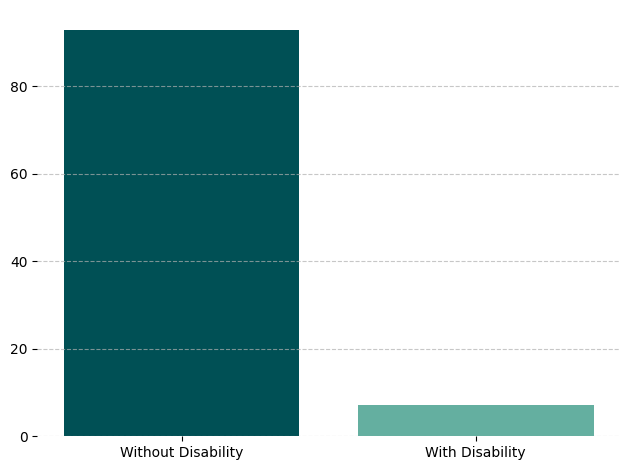

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of respondents with and without a disability
disability_counts = original_data['Disability'].value_counts().reset_index(name='Count')
disability_counts['percentage'] = round((disability_counts['Count'] / len(original_data)) * 100, 2)
disability_labels = ['Without Disability', 'With Disability']

# Bar chart
plt.bar(disability_labels, disability_counts['percentage'], color=colors)
#plt.title("Disability Prevalence", fontsize=10)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [72]:
region_wise_disability = original_data.groupby(['REGION', 'Disability']).size().reset_index(name='Total')
region_wise_disability

,REGION,Disability,Total
0,East,False,10
1,North,False,156
2,North,True,10
3,Other,False,29
4,South,False,43
5,West,False,72
6,West,True,14


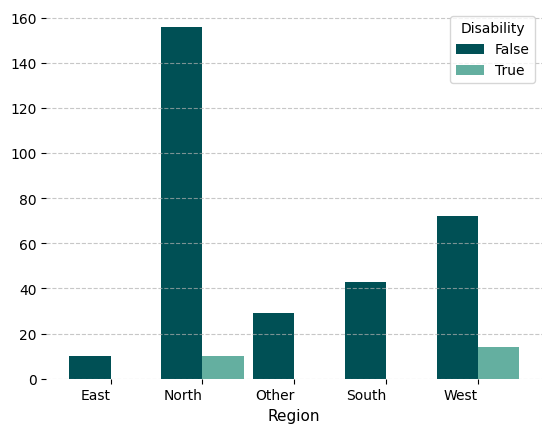

In [69]:
vis_region_wise_disability = region_wise_disability.pivot(index='REGION', columns='Disability', values='Total')

# plottting the clustered bar chart with adjusted layout
ax = vis_region_wise_disability.plot(kind='bar', width=0.9, color=colors)

#plt.title("Region-Wise Disability Percentage", fontsize=12)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel("Region", fontsize=11)
plt.xticks(rotation=0, ha='right', fontsize=10)

plt.show()